# Python Workshop 7

October 11, 2017

## Timestamps

We introduced the **datetime** module back in Workshop 3.
But that was a long time ago; so let's briefly reacquaint
ourselves.

In [3]:
from datetime import date
from datetime import time
from datetime import datetime

The above import statements implies that the **datetime**
module contains classes, among other types, `date`, `time`,
and `datetime`.  The last one can be confusing since the
name of the class and the name of the module are the same.
Note how the following statements differ.

```
from datetime import datetime
import datetime
```

The first one imports the `datetime` class into the namespace.
The second one simply imports the `datatime` module.  The
first line means you can refer to the class as `datetime`.
To do the same with the second import, you need `datetime.datetime`.

Let's quickly review some examples.

In [4]:
d1 = date(2017, 10, 5)
today = date.today()
today - d1

datetime.timedelta(6)

Two ways we can create a **date** object are

* from its constructor - as we saw assigned to `d1`,
* from the static function `today`, which returns today's date.

We also see that **timedelta** is another class within the
**datetime** module.

In [5]:
t1 = time(10, 30, 15)
t1

datetime.time(10, 30, 15)

In [6]:
dt1 = datetime(2017, 10, 5, 10, 30, 15)
now = datetime.now()
now - dt1

datetime.timedelta(5, 75722, 63306)

There are two functions used for conversion between
strings and these objects:

* `strptime` - a class method of `datetime` that parses
  a string and returns a `datetime.datetime` object.
* `strftime` - an object method of each of `date`,
  `time`, and `datetime`.  This returns a string in
  the desired format.

![timeparse](timeparse.png)

The template characters for converting between
strings and `datetime` objects are documented in
the Python API.

<https://docs.python.org/3.5/library/datetime.html#strftime-strptime-behavior>

The following demonstrates some of the commonly
used templates.

In [7]:
dt1.strftime("%m/%d/%y")

'10/05/17'

In [8]:
dt1.strftime("%Y-%m-%d %H:%M:%S")

'2017-10-05 10:30:15'

In [9]:
dt1.strftime("%B %d, %Y which is a %A")

'October 05, 2017 which is a Thursday'

In [10]:
compactDate = "%Y%m%d"
datetime.strptime("20171015", compactDate)

datetime.datetime(2017, 10, 15, 0, 0)

In [11]:
xmlDateTime = "%Y-%m-%dT%H:%M:%S%z"
datetime.strptime("2017-10-13T23:20:00-0800", xmlDateTime)

datetime.datetime(2017, 10, 13, 23, 20, tzinfo=datetime.timezone(datetime.timedelta(-1, 57600)))

So far, we've been working with objects in the **datetime**
module provided with most core Python distributions.

When we expect to analyze a time series with Pandas,
we generally use the timestamp for the index.
Pandas will convert objects from the **datetime** module
to a **datetime64[ns]** type from the **NumPy** module.

In [12]:
from datetime import timedelta
today = datetime(2017, 9, 29)
oneday = timedelta(1)
oneweek = [today,
           today + oneday,
           today + oneday*2,
           today + oneday*3,
           today + oneday*4,
           today + oneday*5,
           today + oneday*6]
oneweek

[datetime.datetime(2017, 9, 29, 0, 0),
 datetime.datetime(2017, 9, 30, 0, 0),
 datetime.datetime(2017, 10, 1, 0, 0),
 datetime.datetime(2017, 10, 2, 0, 0),
 datetime.datetime(2017, 10, 3, 0, 0),
 datetime.datetime(2017, 10, 4, 0, 0),
 datetime.datetime(2017, 10, 5, 0, 0)]

Now look what happens when we make it the index of
Pandas `Series`.

In [13]:
import numpy as np
import pandas as pd
ts = pd.Series(np.random.poisson(50, 7), index=oneweek)
ts

2017-09-29    48
2017-09-30    47
2017-10-01    57
2017-10-02    57
2017-10-03    62
2017-10-04    60
2017-10-05    55
dtype: int64

In [14]:
ts.index

DatetimeIndex(['2017-09-29', '2017-09-30', '2017-10-01', '2017-10-02',
               '2017-10-03', '2017-10-04', '2017-10-05'],
              dtype='datetime64[ns]', freq=None)

As we mentioned in the last workshop, timestamp indices in Pandas
allow a great degree of latitude with how they are selected.
Any string that can be interpreted as a time can be used to
index into the series.

In [15]:
ts['10/02/17']

57

In [16]:
ts['2017-10-02']

57

In [17]:
ts['20171002']

57

In [18]:
ts['2017-10-01':'2017-10-03']

2017-10-01    57
2017-10-02    57
2017-10-03    62
dtype: int64

In [19]:
ts['2017-10']

2017-10-01    57
2017-10-02    57
2017-10-03    62
2017-10-04    60
2017-10-05    55
dtype: int64

In [20]:
ts['2017']

2017-09-29    48
2017-09-30    47
2017-10-01    57
2017-10-02    57
2017-10-03    62
2017-10-04    60
2017-10-05    55
dtype: int64

When we wish to generate the index ourselves, we can
do so more easily through the Pandas `date_range` utility.

In [21]:
ts = pd.Series(np.random.poisson(50, 500),
               index=pd.date_range('2017-01-01', periods=500))
ts.tail()

2018-05-11    55
2018-05-12    55
2018-05-13    46
2018-05-14    52
2018-05-15    53
Freq: D, dtype: int64

Sometimes we get time series data well beyond the interval of interest.
It's common to truncate the time series in this case.

In [22]:
summer = ts.truncate(before='2017-06-21', after='2017-09-20')
summer.head()

2017-06-21    49
2017-06-22    49
2017-06-23    49
2017-06-24    48
2017-06-25    63
Freq: D, dtype: int64

In [23]:
summer.tail()

2017-09-16    60
2017-09-17    63
2017-09-18    44
2017-09-19    53
2017-09-20    54
Freq: D, dtype: int64

## Combining Datasets

Sometimes you have two data frames or series that you want
to combine into one.  This simple concept has many variations
and complications that we'll investigate over the next few
workshops.

### Merge

The `pd.merge` function provides merge options akin to **join**
features associated with relational databases.  The following
examples are based on Section 8.2 of *Python for Data Analysis*
by Wes McKinney.  But before we start these samples, let's review
a quick tip commonly used to create lists of words in Python.

In [24]:
key = ['b', 'b', 'a', 'c', 'a', 'a', 'b']
key

['b', 'b', 'a', 'c', 'a', 'a', 'b']

The above list is simple; and yet error prone to type.
Perhaps, you accidently flip a quote and a comma, or 
forget a quote which causes the line not to parse.
In the simple case of a list of strings without spaces,
we can assign the same value using the `str.split` function.

In [25]:
'b b a c a a b'.split()

['b', 'b', 'a', 'c', 'a', 'a', 'b']

White space is the default separator for the `str.split` method.
But other separators can be specified explicitly.

In [26]:
'the first, the second one, and finally the third'.split(',')

['the first', ' the second one', ' and finally the third']

Note the second and third items have a leading space.
If we anticipate a leading space, we can specify it in the
`split` argument.

In [27]:
'the first, the second one, and finally the third'.split(', ')

['the first', 'the second one', 'and finally the third']

In the even more specialized case that each string is
a single character, we can use the `list` function.

In [28]:
list('bbacaab')

['b', 'b', 'a', 'c', 'a', 'a', 'b']

We should now have sugar-high from all that syntactic candy.
Let's get down to business with two simple data frames.

In [29]:
df1 = pd.DataFrame({'key': list('bbacaab'), 'data1': range(7)})
df2 = pd.DataFrame({'key': list('abd'),     'data2': range(3)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [30]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


Start with an inner join.

In [31]:
pd.merge(df1, df2, on='key', how='inner')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


There are several things to note about the result.

* The indices for `df1` and `df2` played no role in the merge.
  The index of the result has no relationship to the inputs.

* The values of `key` in the result are the intersection of the
  `key` values in `df1` and `df2`.  The `c` value from `df1` and
  the `d` value from `df2` were discarded.

* The default value of the `on` parameter is the
  set of columns in `df1` that are named the same in `df2`.
  In the above case we could have left it off.  But it's good
  to always explicitly specify it.

* The default value of the `how` parameter is `inner`.
  We could have left this off as well; but it's best to be
  explicit.

The other options for `how` are

* __left__ - All the values of the join column from the left side
  are included.  Those without a value on the right side will have
  `NA` for their values.

* __right__ - The "right" version of "left."

* __outer__ - All values of the join columns are present.


In [32]:
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1.0
1,1,b,1.0
2,2,a,0.0
3,3,c,NaN
4,4,a,0.0
5,5,a,0.0
6,6,b,1.0


We don't always have join columns named the same across
the two data frames.

In [33]:
df1 = pd.DataFrame({'lkey': list('bbacab'), 'data1': range(6)})
df2 = pd.DataFrame({'rkey': list('abd'),    'data2': range(3)})
pd.merge(df1, df2, left_on='lkey', right_on='rkey', how='inner')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,5,b,1,b
3,2,a,0,a
4,4,a,0,a


In the case above, since the `lkey` and `rkey` will always have
the same value, we would probably delete one of them and renaming
the other before proceding.

### Concatenation

Concatenation is performed along an axis.

* __axis=0__ (default) vertically
* __axis=1__ horizontally

Unlike with the `merge` above, the `pd.concat` considers the index
when performing the concatenation.

In [34]:
s1 = pd.Series([0,1],   index=list('ab'))
s2 = pd.Series([2,3,4], index=list('abc'))
s3 = pd.Series([5,6],   index=list('de'))
pd.concat([s1, s2, s3])

a    0
b    1
a    2
b    3
c    4
d    5
e    6
dtype: int64

We can see above the default `axis=0` at work, stacking things vertically.
Note that the index is not unique.

In [44]:
pd.concat([s1, s2, s3]).index.is_unique

False

We can stack each series in its own column (horizontally) with `axis=1`.

In [35]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,2.0,NaN
b,1.0,3.0,NaN
c,NaN,4.0,NaN
d,NaN,NaN,5.0
e,NaN,NaN,6.0


Once again, we see how the indices are respected.
The index of the result is the union of the component
indices.
`NaN` (Not a Number) values result when a column is
added that doesn't have all index values.
The data frame names the columns numerically.
We can specify the column values with the `keys` parameter.

In [36]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,2.0,NaN
b,1.0,3.0,NaN
c,NaN,4.0,NaN
d,NaN,NaN,5.0
e,NaN,NaN,6.0


If stacking vertically, the keys form a hierarchical index.

In [37]:
s4 = pd.concat([s1, s2, s3], axis=0, keys=['one', 'two', 'three'])
s4

one    a    0
       b    1
two    a    2
       b    3
       c    4
three  d    5
       e    6
dtype: int64

In [38]:
s4['one']

a    0
b    1
dtype: int64

As shown above, this let's you slice the result by the
original chunks.

### Crime Data

Let's apply this to an API call.  Many times an API call for data
will not return the entire result set in one response.  Rather, it
will return a single "page."  This no different in principle to
scrolling through pages in a web browser.  Our API client code must
retrieve each page and then concatenate them at the end.

We'll turn once again to the dataset published by the
Los Angeles County Sheriff on the LA County Open Data portal
that we explored in the last workshop.  First create a string
template for the URL.  It's similar to the URL we used last time.
It has three parameters.

* `$order=:id` - This is a Socrata API parameter that requests the results
  be ordered by their ID.  We request this because we will be retrieving
  the results by row offsets.

* `$limit={}` - This specifies the number of rows per page.  The `{}` is
  a Python `format` placeholder.

* `$offset={}` - This the offset from the beginning of the dataset in
  terms of row number (not page number).
  
Below is an example of providing a page size of `20` and an offset of `0`.

In [39]:
url = 'https://data.lacounty.gov/resource/uvdj-ch3p.json?$order=:id&$limit={}&$offset={}'
url.format(20, 0)

'https://data.lacounty.gov/resource/uvdj-ch3p.json?$order=:id&$limit=20&$offset=0'

Now let's fetch three pages.

In [40]:
df1 = pd.read_json(url.format(20, 0))
df2 = pd.read_json(url.format(20,20))
df3 = pd.read_json(url.format(20,40))
(len(df1), len(df2), len(df3))

(20, 20, 20)

We have three data frames, each containing a page of 20 rows.

In [41]:
cf1 = pd.concat([df1, df2, df3])
cf1.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
            14, 15, 16, 17, 18, 19,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            11, 12, 13, 14, 15, 16, 17, 18, 19],
           dtype='int64')

Notice the index repeats 3 times.
Now set the index to be the crime identifier.

In [42]:
cf1.set_index('crime_identifier', inplace=True)
cf1.index.is_unique

True

Check out what happens if we reset the index.

In [43]:
cf1.reset_index(inplace=True)
cf1.index

RangeIndex(start=0, stop=60, step=1)

This shows that the `reset_index` function just renumbers
the index with integers.

Now that we understand how concatenation works with Pandas
and how pagination works with Socrata, let's gather a few
more samples and wrap up with a few quick plots.  If you're
following along in IPython, remember you initialize your
`matplotlib` plotting system with

```
%matplotlib
```

Only the Jupyter notebook requires the `inline` following it.

In [45]:
from matplotlib import pyplot as plt
%matplotlib inline
df1 = pd.read_json(url.format(1000,    0))
df2 = pd.read_json(url.format(1000, 1000))
df3 = pd.read_json(url.format(1000, 2000))
cf2 = pd.concat([df1, df2, df3])
cf2.set_index('crime_identifier', inplace=True)
len(cf2)

3000

3,000 is still a small sample size.  I don't want to
overwhelm the Open Data server by us all hitting it
at the same time.  However, feel free to download
10s of thousands of rows on your own time.  That 
shouldn't be a problem.

The plot below is a quick bar chart of the of top 10
occurrences of `station_identifier`.

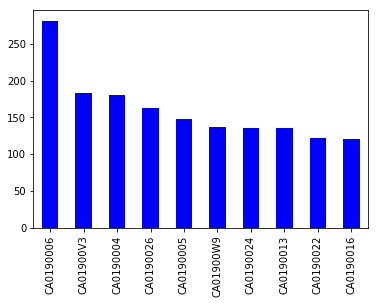

In [47]:
plt.figure
cf2['station_identifier'].value_counts().head(10).plot.bar(color='b')

This plot uses the **matplotlib** library that we explored last Spring.
I'd like to conclude this workshop by introducing you to another plotting
library called **Seaborn**.  It runs on top of **matplotlib**; but offers
some more refined renderings.

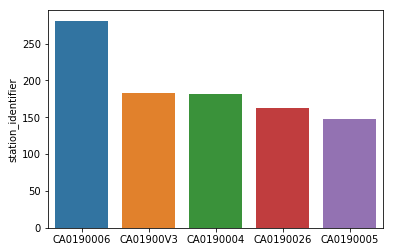

In [48]:
import seaborn as sns
plt.figure()
top5 = cf2['station_identifier'].value_counts().head(5)
sns.barplot(x=top5.index, y=top5)

This is barely scratching the surface of Seaborn.
You're encouraged to checkout its possibilities at

<http://seaborn.pydata.org/>

We'll be exploring more Seaborn in later workshops.

--------------------------------------------
End of Workshop 7